# Buffer and Quality of Service Simulations - Mathematical Modelling Case Study

In [1]:
# IMPORT APPROPRIATE LIBRARIES #
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = 1

In [69]:
def simulation():
    # CHOOSE PARAMETERS #
    lamb = 1; mu = 1; B = 3; T = 100
    a = [1,2,1]; p = [0.3,0.1,0.6] # mixture of exponential arrays, p must sum to 1
    p_cum = np.cumsum(p) # lmao

    buff_property = {}

    # SET PARAMETERS FOR LOOP #
    elapsing = True # while loop parameter
    t_elapsed = 0 # time elapsed since t=0 (starts at 0)
    arrivals = np.array([]) # array for time between data arrivals
    buff_state = 0 # current buffer state (starts at 0)
    buff_array = np.zeros(1) # array to store buffer state at every data arrival (first entry is 0 for state at t=0)
    job_size_array = np.array([])
    num_rejected_job = 0
    rejected_data_size = 0

    # SIMULATE BUFFER WITH WHILE LOOP           #
    while elapsing:
        
        t_arrival = np.random.exponential(lamb) # sample time between data arrivals from exp dist
    
        if t_elapsed + t_arrival <= T: # make sure arrivals fall within the time range t specified
            arrivals = np.append(arrivals,t_arrival) 
            t_elapsed += t_arrival # update current time
            
            p_finder = np.random.uniform()                      # select a random value in range [0,1]
            p_index = np.searchsorted(p_cum, p_finder, 'right') # use p_finder to find which exponential in mixture to sample from
            job_size = np.random.exponential(a[p_index])        # sample job size from chosen distribution
            job_size_array = np.append(job_size_array,job_size)

            if ((max(buff_state - mu*t_arrival,0) + job_size) > B):
                num_rejected_job = num_rejected_job + 1
                diff = (max(buff_state - mu*t_arrival,0) + job_size) - B
                rejected_data_size = rejected_data_size + diff

            buff_state = min(B,max(buff_state - mu*t_arrival,0) + job_size) # find buffer state
            buff_array = np.append(buff_array,buff_state)
            #print(buff_state)
        else:
            elapsing = False # end loop when time elapsed exceeds final time T

            if (max(buff_state - mu*(T-t_elapsed),0) > B):
                num_rejected_job = num_rejected_job + 1
                diff = (max(buff_state - mu*t_arrival,0) + job_size) - B
                rejected_data_size = rejected_data_size + diff


            final_buff_state = min(B,max(buff_state - mu*(T-t_elapsed),0)) # find buffer state at final time t=T
            buff_array = np.append(buff_array,final_buff_state)
            
    arrival_timestamp_list = np.cumsum(arrivals)
    arrival_timestamp_list = np.append(0,arrival_timestamp_list)
    arrival_timestamp_list = np.append(arrival_timestamp_list,T)
    job_size_array = np.append(0,job_size_array)
    job_size_array = np.append(job_size_array,0)
    buff_property["arrival_timestamp"] = arrival_timestamp_list
    buff_property["job_size"] = job_size_array
    buff_property["buff_occupancy"] = buff_array/B                     ## ?????? not sure how to name this

    return buff_property, num_rejected_job, rejected_data_size
        

In [70]:
buff_property,num_rejected_job,rejected_data_size = simulation()

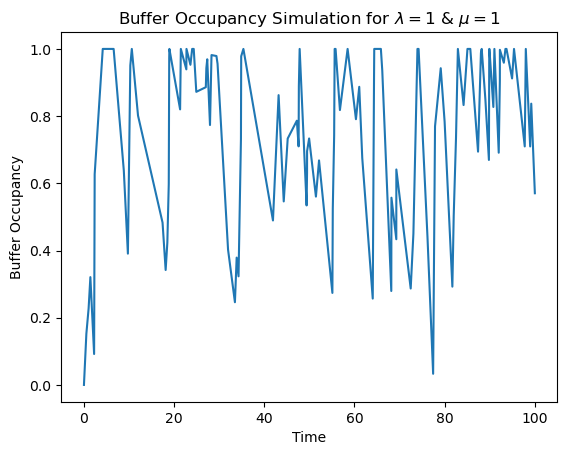

In [71]:
# t_plot = np.cumsum(arrivals) # time array for plotting that cumulatively sums arrival times
# t_plot = np.append(0,t_plot); t_plot = np.append(t_plot,T) # add 0 time and final time T to start and end of the array
#buff_plot = buff_array/3                # find buffer occupancy array by dividing by buffer size

# PLOT BUFFER OCCUPANCY OVER TIME #
#plt.plot(arrival_timestamp_list,buff_plot)
plt.plot(buff_property["arrival_timestamp"],buff_property["buff_occupancy"])
plt.xlabel('Time'); plt.ylabel('Buffer Occupancy')
plt.title(f'Buffer Occupancy Simulation for $\lambda = {lamb}$ & $\mu = {mu}$')
plt.show()

In [72]:
# Quality of Service: proportion of jobs that need retransmission
delta= num_rejected_job/(len(buff_property["job_size"])-2)
delta

0.28695652173913044

In [74]:
# Quality of Service: proportion of data that need retransmission
total_job=buff_property["job_size"].sum()
episolon = rejected_data_size/total_job
episolon

0.24573177469047938

In [77]:
# Quality of Service: average time a job has to wait before it begins transmission
mu = 1
avg_buff_occupancy = np.average(buff_property["buff_occupancy"])
t_bar = avg_buff_occupancy/mu
t_bar

0.7531166948389905